In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
dados = pd.read_csv('dados.csv', sep=';')
dados.head(5)

,TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2
0,T126,ALG-I,1P,1,0,NaN
1,T126,ALG-I,1P,1,0,NaN
2,T126,ALG-I,1P,1,P,P
3,T126,ALG-I,1P,1,0,NaN
4,T126,ALG-I,1P,1,H,H


In [186]:
split_data = dados.TURMA.str.split('(\d)(\d)(\d)', regex=True, expand=True)
split_data

,0,1,2,3,4
0,T,1,2,6,
1,T,1,2,6,
2,T,1,2,6,
3,T,1,2,6,
4,T,1,2,6,
...,...,...,...,...,...
452,T,1,6,3,
453,T,1,6,3,
454,T,1,6,3,
455,T,1,6,3,


In [187]:
dados['unidade'] = split_data.iloc[:,1]
dados['dia_da_semana'] = split_data.iloc[:,2]
dados['turno'] = split_data.iloc[:,3]
dados.head(5)

,TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2,unidade,dia_da_semana,turno
0,T126,ALG-I,1P,1,0,NaN,1,2,6
1,T126,ALG-I,1P,1,0,NaN,1,2,6
2,T126,ALG-I,1P,1,P,P,1,2,6
3,T126,ALG-I,1P,1,0,NaN,1,2,6
4,T126,ALG-I,1P,1,H,H,1,2,6


In [188]:
dados.isna().sum()

TURMA              0
DISCIPLINA         0
PERÍODO            0
SEXO               0
PESQ1              0
PESQ2            173
unidade            0
dia_da_semana      0
turno              0
dtype: int64

# Transforming days of week from number to name

In [189]:
def transform_day_of_week(row):
    days = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
    for i, day in enumerate(days):
        if row == str(i+2):
            return day

dados.dia_da_semana = dados.dia_da_semana.apply(transform_day_of_week)

# Creating column shift

In [190]:
def create_shift_col(row):
    if int(row) <= 3 : return 'Noite'
    else: return 'Manhã'

dados['shift'] = dados.turno.apply(create_shift_col)

In [191]:
def transform_turno(row):
    if int(row) == 1: return '1º Turno da Noite'
    if int(row) == 2: return '2º Turno da Noite'
    if int(row) == 3: return '3º Turno da Noite'
    if int(row) == 5: return '1º Turno da Manhã'
    if int(row) == 6: return '2º Turno da Manhã'
    if int(row) == 7: return '3º Turno da Manhã'
    else: return row
dados.turno = dados.turno.apply(transform_turno)

# Transforming sex column

In [192]:
def transform_sex(row):
    if row == 1: return 'Masculino'
    else: return 'Feminino'
dados.SEXO = dados.SEXO.apply(transform_sex)

# Filling missing info in PESQUISA

In [193]:
dados.PESQ2.fillna('Não Informado', inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11124\2260035531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados.PESQ2.fillna('Não Informado', inplace=True)


In [194]:
dados

,TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2,unidade,dia_da_semana,turno,shift
0,T126,ALG-I,1P,Masculino,0,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
1,T126,ALG-I,1P,Masculino,0,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
2,T126,ALG-I,1P,Masculino,P,P,1,Segunda,2º Turno da Manhã,Manhã
3,T126,ALG-I,1P,Masculino,0,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
4,T126,ALG-I,1P,Masculino,H,H,1,Segunda,2º Turno da Manhã,Manhã
...,...,...,...,...,...,...,...,...,...,...
452,T163,ALG-II,2P,Masculino,0,Não Informado,1,Sexta,3º Turno da Noite,Noite
453,T163,ALG-II,2P,Masculino,R,R,1,Sexta,3º Turno da Noite,Noite
454,T163,ALG-II,2P,Masculino,R,R,1,Sexta,3º Turno da Noite,Noite
455,T163,ALG-II,2P,Masculino,H,H,1,Sexta,3º Turno da Noite,Noite


# Exploring dataset

## Countplots

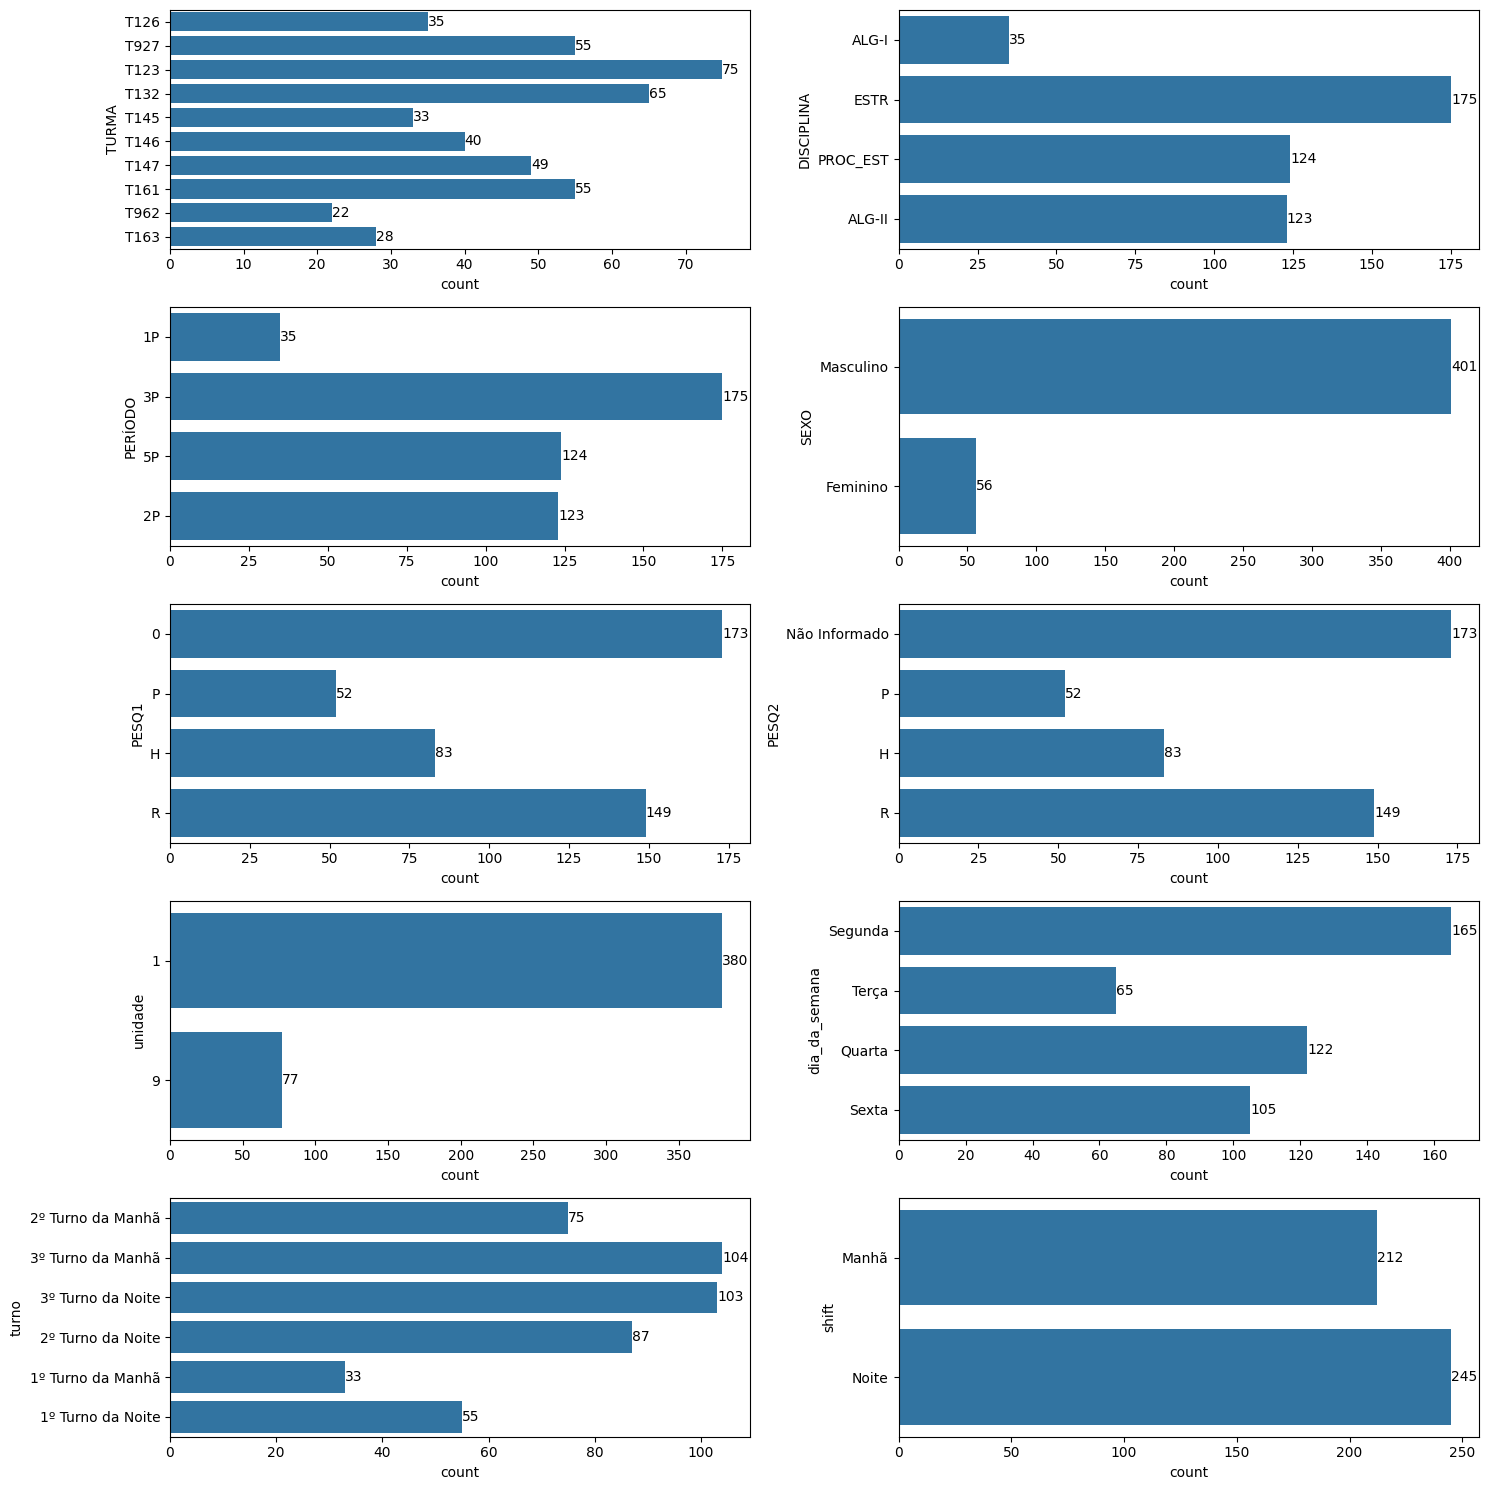

In [195]:
colunas = dados.columns
fig, axs = plt.subplots(nrows=int(len(colunas) / 2), ncols=2, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(dados.columns):
    ax = sns.countplot(dados[col], ax=axs[i])
    _ = ax.bar_label(ax.containers[0])
fig.tight_layout()

- Existe uma disparidade muito grande entre a quantidade de alunos do sexo masculino e feminino.
- A maioria dos estudantes não respondeu a pesquisa
- Entre os que responderam, a maioria prefere a modalidade de aulas remotas
- PESQ1 e PESQ2 são iguais

In [196]:
dados.drop('PESQ1', axis=1, inplace=True)

# Plots by group preference

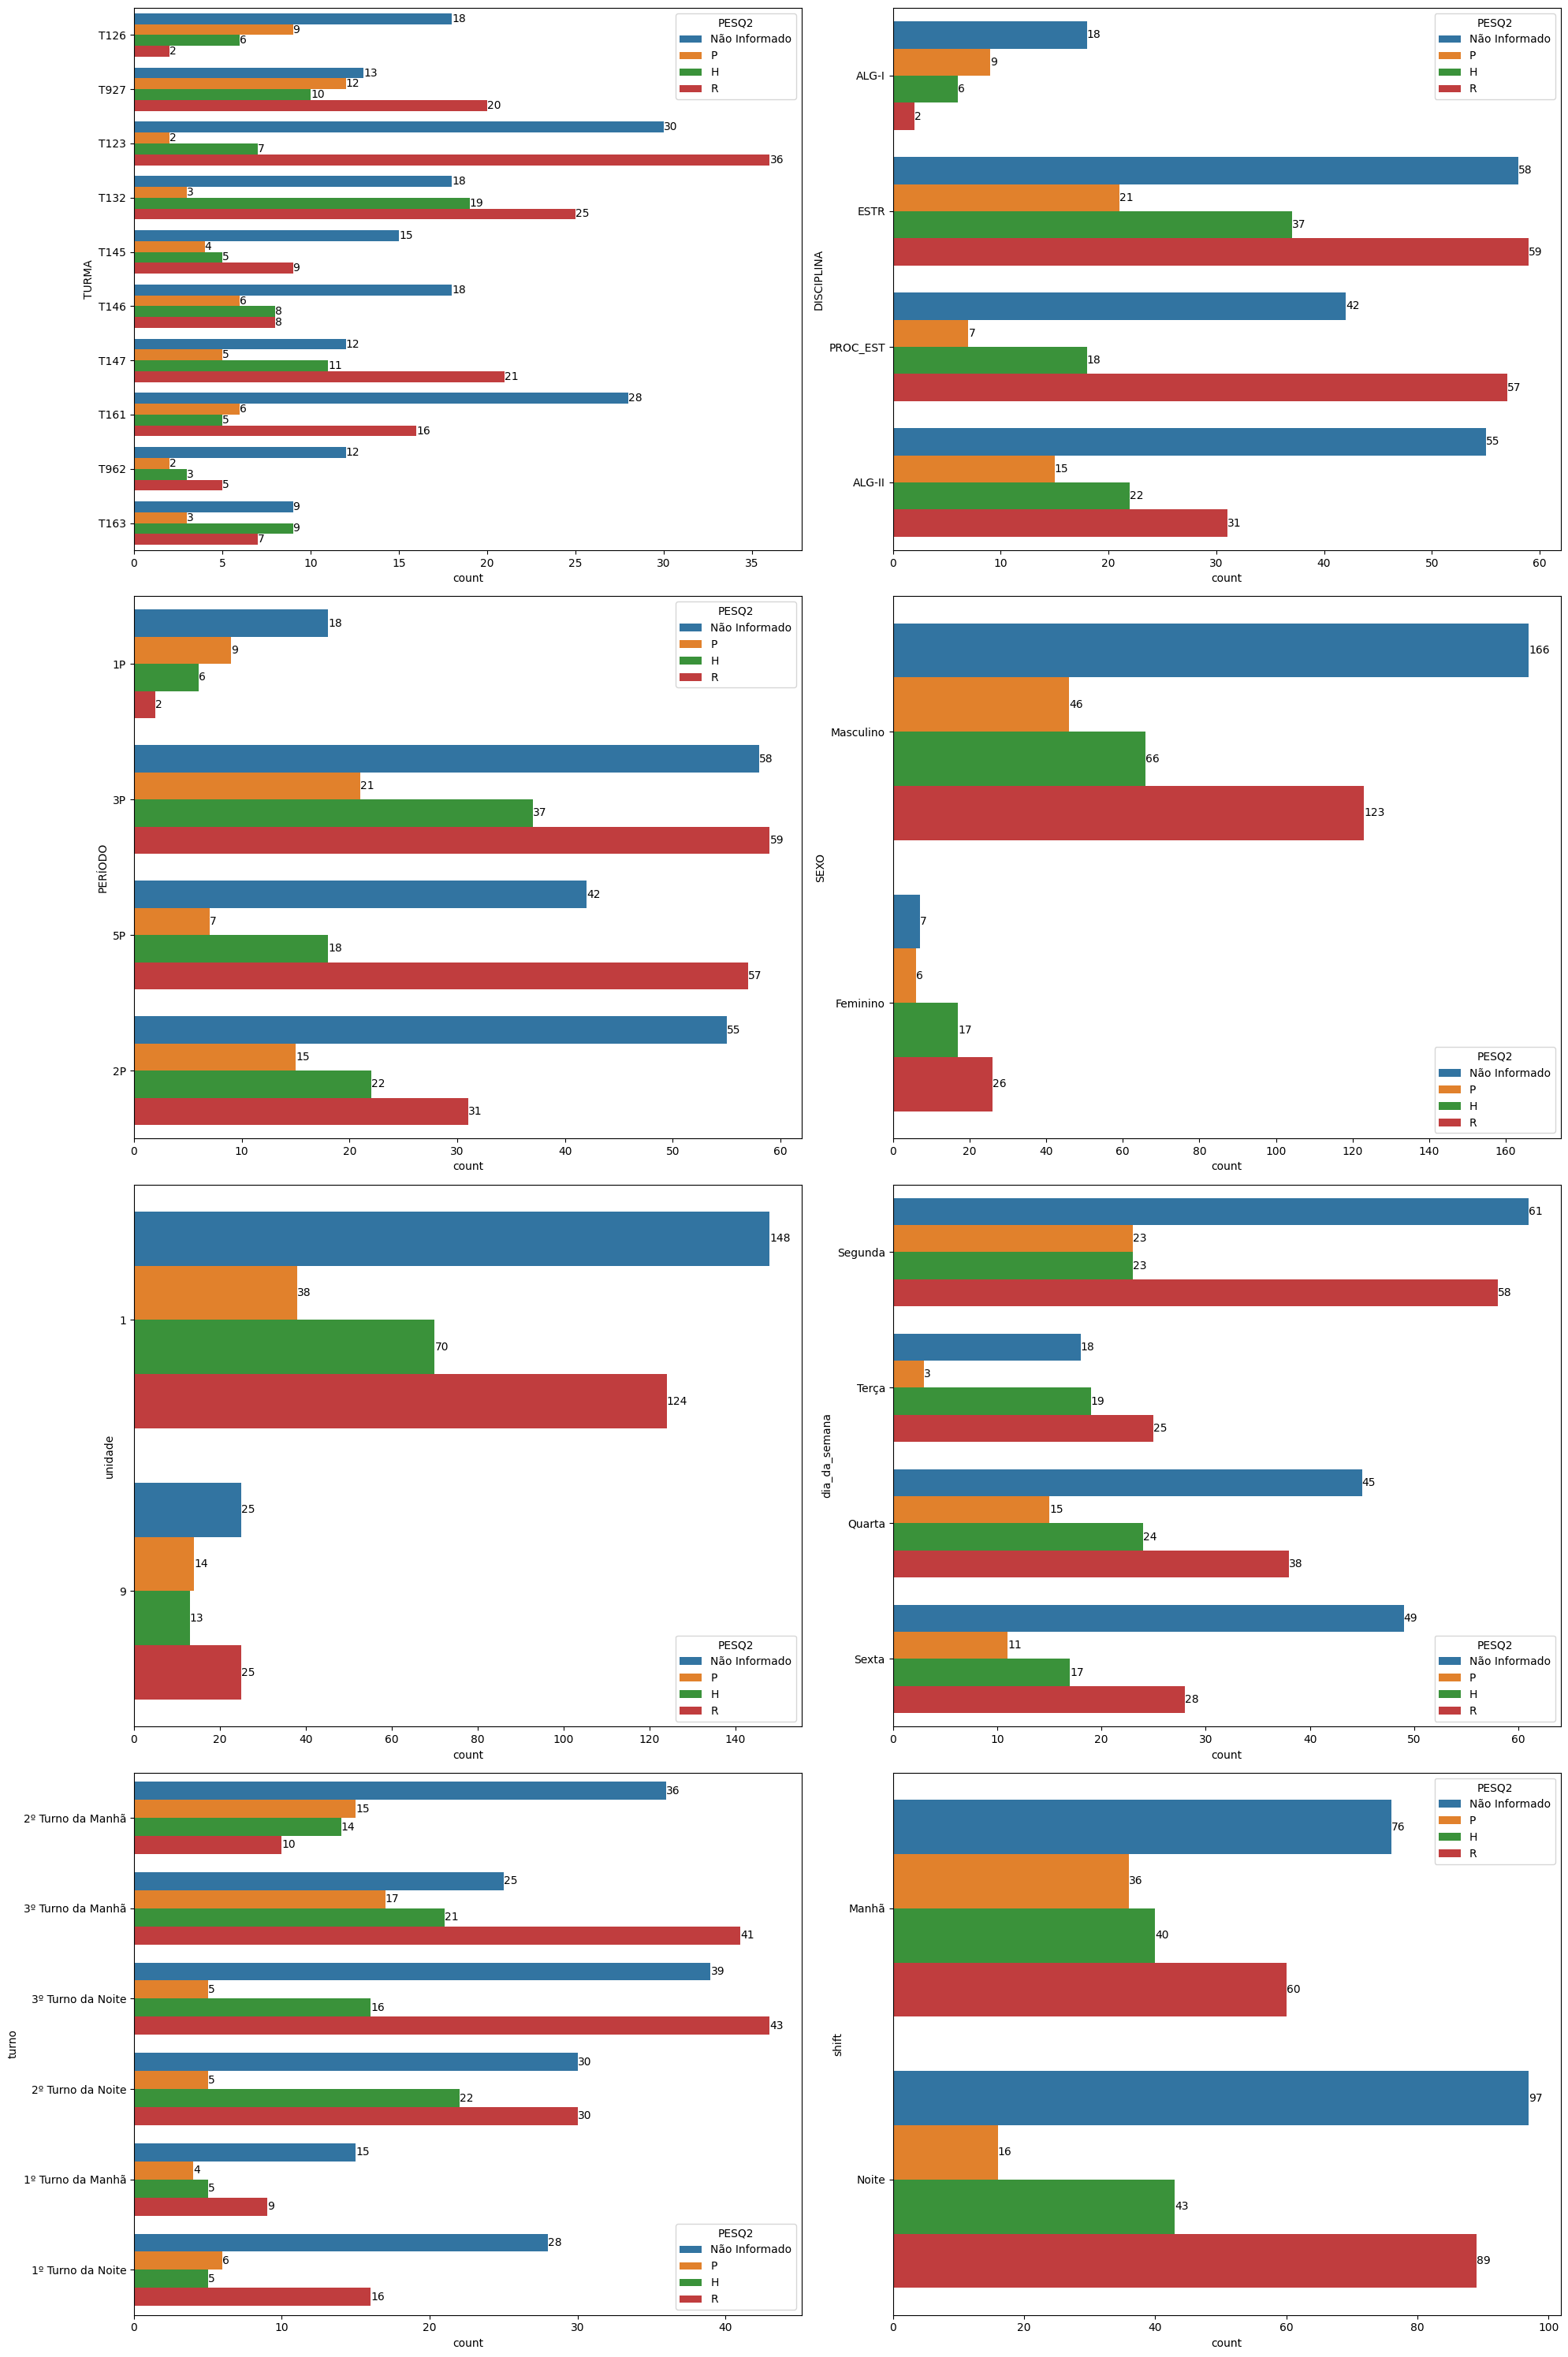

In [197]:
hue = 'PESQ2'
colunas = dados.columns.to_list()
colunas.remove(hue)
fig, axs = plt.subplots(nrows=int(len(colunas) / 2), ncols=2, figsize=(20,30))
axs = axs.flatten()
for i, col in enumerate(colunas):
    if col == 'PESQ2': continue
    ax = sns.countplot(data = dados, y=col, ax=axs[i], hue=hue)
    _ = ax.bar_label(ax.containers[0])
    _ = ax.bar_label(ax.containers[1])
    _ = ax.bar_label(ax.containers[2])
    _ = ax.bar_label(ax.containers[3])
fig.tight_layout()

In [202]:
dados[dados.turno == '2º Turno da Manhã']

,TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ2,unidade,dia_da_semana,turno,shift
0,T126,ALG-I,1P,Masculino,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
1,T126,ALG-I,1P,Masculino,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
2,T126,ALG-I,1P,Masculino,P,1,Segunda,2º Turno da Manhã,Manhã
3,T126,ALG-I,1P,Masculino,Não Informado,1,Segunda,2º Turno da Manhã,Manhã
4,T126,ALG-I,1P,Masculino,H,1,Segunda,2º Turno da Manhã,Manhã
...,...,...,...,...,...,...,...,...,...
298,T146,ALG-II,2P,Masculino,H,1,Quarta,2º Turno da Manhã,Manhã
299,T146,ALG-II,2P,Masculino,Não Informado,1,Quarta,2º Turno da Manhã,Manhã
300,T146,ALG-II,2P,Masculino,H,1,Quarta,2º Turno da Manhã,Manhã
301,T146,ALG-II,2P,Masculino,R,1,Quarta,2º Turno da Manhã,Manhã


- A turma T126, de ALG-I, se manifestou a favor da modalidade Presencial.
- As turmas do 2º Turno da Manhã expressaram preferência pela modalidade Presencial.
- A turma T146 teve empate entre votos a favor da modalidade Presencial e Híbrida